# Data Visualization
Data visualization of the mortgage dataset.

## Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


## Data Preprocessing

In [2]:
data = pd.read_csv('mortgage.csv')
data.head()


,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [3]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.median()), axis=0)
data['loan_age'] = data['time'] - data['orig_time']
data['time_to_maturity'] = data['mat_time'] - data['time']
data['time_since_first_obs'] = data['time'] - data['first_time']
data['default_label'] = np.where(data['status_time'] == 1, 1, 0)
data = data.drop(columns=['time', 'orig_time', 'first_time', 'mat_time', 'default_time', 'payoff_time', 'status_time'])
data = data.groupby('id').apply(lambda x: x.assign(default_label=max(x['default_label']))).reset_index(drop=True)
data.head()


,id,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,loan_age,time_to_maturity,time_since_first_obs,default_label
0,1,41303.42,24.498336,9.2,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.2,87.03,32,88,0,1
1,1,41061.95,24.483867,9.2,225.10,2.151365,4.7,0,0,1,0,45000.0,715,69.4,9.2,87.03,33,87,1,1
2,1,40804.42,24.626795,9.2,222.39,2.361722,4.4,0,0,1,0,45000.0,715,69.4,9.2,87.03,34,86,2,1
3,1,40483.89,24.735883,9.2,219.67,1.229172,4.6,0,0,1,0,45000.0,715,69.4,9.2,87.03,35,85,3,1
4,1,40367.06,24.925476,9.2,217.37,1.692969,4.5,0,0,1,0,45000.0,715,69.4,9.2,87.03,36,84,4,1


## Count Plot
The distribution of the default label.

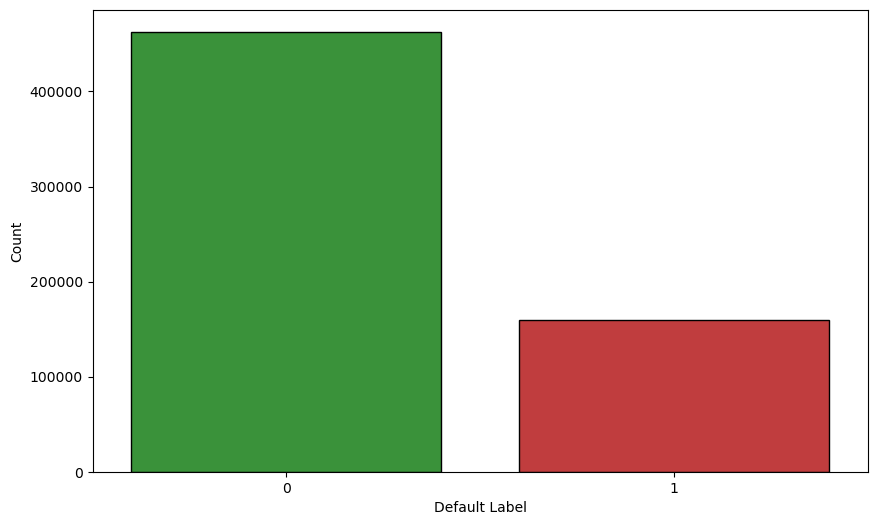

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(x='default_label', hue='default_label', data=data, palette=['#2ca02c', '#d62728'], edgecolor='black', dodge=False, legend=False)
plt.xlabel('Default Label')
plt.ylabel('Count')
plt.show()


## Correlation Analysis
The relationships between various features and the default label.

In [5]:
correlation_with_default = data.corr()['default_label'].sort_values(ascending=False)
correlation_with_default


default_label              1.000000
time_to_maturity           0.220252
LTV_time                   0.191568
hpi_orig_time              0.186336
interest_rate_time         0.181148
LTV_orig_time              0.085477
hpi_time                   0.050094
Interest_Rate_orig_time    0.021372
balance_time               0.019019
REtype_CO_orig_time        0.010769
REtype_PU_orig_time        0.006714
REtype_SF_orig_time        0.000243
balance_orig_time         -0.006236
investor_orig_time        -0.010973
id                        -0.018540
uer_time                  -0.075876
FICO_orig_time            -0.130313
gdp_time                  -0.137712
time_since_first_obs      -0.220195
loan_age                  -0.241545
Name: default_label, dtype: float64

## Histogram
Histogram of some key features.

### Loan Age

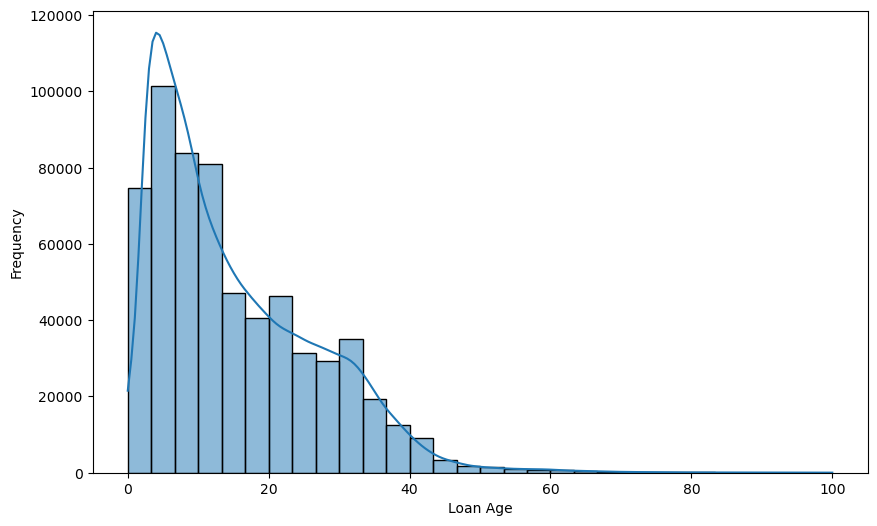

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['loan_age'], bins=30, kde=True)
plt.xlabel('Loan Age')
plt.ylabel('Frequency')
plt.show()


### Time to Maturity

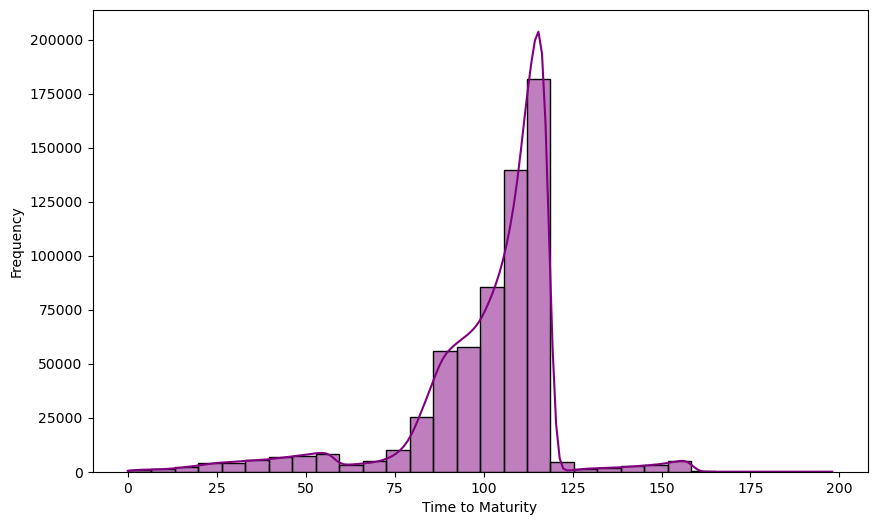

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['time_to_maturity'], bins=30, kde=True, color='purple')
plt.xlabel('Time to Maturity')
plt.ylabel('Frequency')
plt.show()


### Time since First Observation

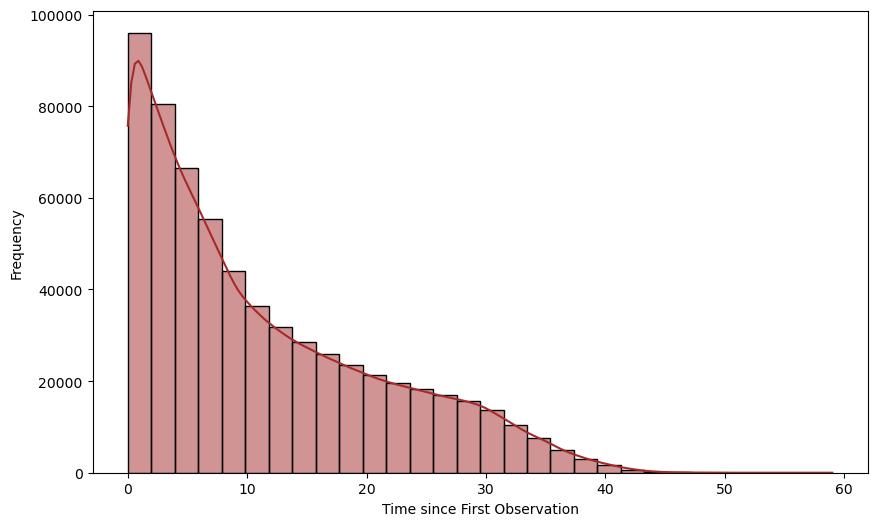

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['time_since_first_obs'], bins=30, kde=True, color='brown')
plt.xlabel('Time since First Observation')
plt.ylabel('Frequency')
plt.show()


### LTV Time

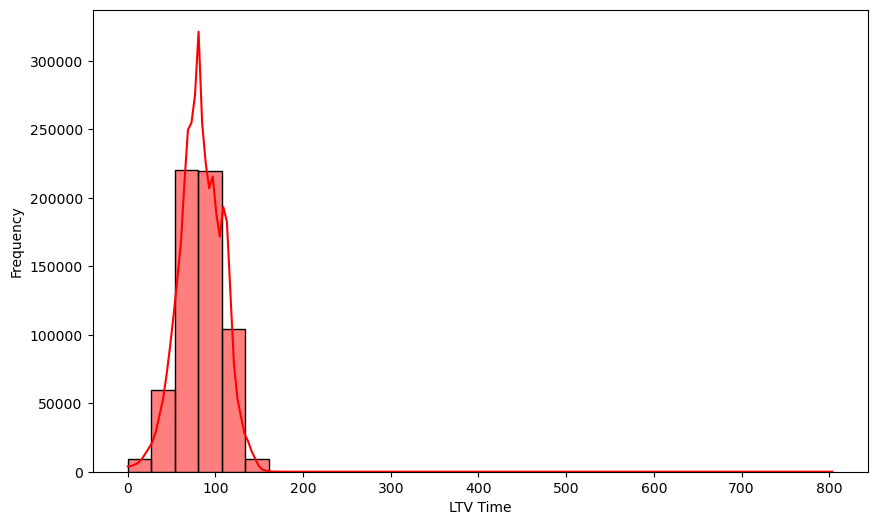

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['LTV_time'], bins=30, kde=True, color='red')
plt.xlabel('LTV Time')
plt.ylabel('Frequency')
plt.show()


## Standardization

In [10]:
numeric_features = [
    'balance_time', 'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time', 'balance_orig_time', 'FICO_orig_time',
    'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time', 'loan_age', 'time_to_maturity', 'time_since_first_obs'
]
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features].values)
data.head()


,id,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,loan_age,time_to_maturity,time_since_first_obs,default_label
0,1,-0.955665,-2.346616,1.201182,1.525729,0.772713,-0.945824,0,0,1,0,-0.961478,0.576973,-0.945534,1.192204,-3.270602,1.433239,-0.636842,-1.119776,1
1,1,-0.956792,-2.347196,1.201182,1.482692,0.392098,-0.945824,0,0,1,0,-0.961478,0.576973,-0.945534,1.192204,-3.270602,1.518708,-0.684348,-1.019738,1
2,1,-0.957995,-2.341471,1.201182,1.384684,0.499170,-1.101958,0,0,1,0,-0.961478,0.576973,-0.945534,1.192204,-3.270602,1.604176,-0.731853,-0.919699,1
3,1,-0.959491,-2.337101,1.201182,1.286314,-0.077296,-0.997868,0,0,1,0,-0.961478,0.576973,-0.945534,1.192204,-3.270602,1.689644,-0.779358,-0.819661,1
4,1,-0.960037,-2.329506,1.201182,1.203134,0.158775,-1.049913,0,0,1,0,-0.961478,0.576973,-0.945534,1.192204,-3.270602,1.775112,-0.826864,-0.719622,1
